# Importing Library Files

In [2]:
import librosa
import numpy as np
import sounddevice as sd
import IPython.display as ipd
import matplotlib.pyplot as plt

from models import get_full_model, get_speaker_embedding_model, load_saved_model
from inference import inference_input
from utterance_utils import mag_spectro2wav

# Model Loading

In [3]:
model = get_full_model()

## Pretrained model

In [4]:
model.load_weights('pretrained_models/model1351.hdf5', by_name=True)
model.load_weights('pretrained_models/model184.hdf5', by_name=True)

## Recorded file

In [5]:
fs = 32000
# myrecording, _ = librosa.load('/home/spkt_sagar/Downloads/Background-Noise-In-Audacity-AudioTrimmer.com.mp3', sr=fs, mono=True)
myrecording, _ = librosa.load('/home/spkt_sagar/Downloads/download.wav', sr=fs, mono=True)
myrecording = myrecording[:5*fs]

## Recording

In [ ]:
duration = 5  # seconds
fs = 32000

myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1, blocking=True)
myrecording = np.squeeze(myrecording)

In [6]:
ipd.Audio(myrecording, rate=fs)

In [18]:
inp = inference_input('This is research management unit mid term project.$', myrecording, 200)

## Predicting on the input audio

In [19]:
decoder_pred, postnet_out, alignments, embeddings = model.predict(inp)

In [20]:
# predicted
y = mag_spectro2wav(postnet_out[0], gl_power=1.3)
ipd.Audio(y, rate=32000)

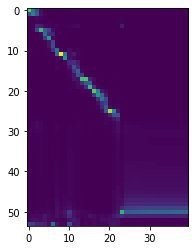

In [10]:
plt.imshow(alignments[0].T)

In [11]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
from pydub import AudioSegment

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
embeddings[0].shape

In [ ]:
np.save('embeddings.npy', embeddings[0])